In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style
import datetime as dt
from dateutil import parser
%matplotlib inline

In [2]:
style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [3]:
print(plt.__file__)

C:\Users\Komron\Anaconda3\lib\site-packages\matplotlib\pyplot.py


In [4]:
path_1 = r'C:\Users\Komron\Documents\PythonData\project_one\WMT'
all_files_wmt = glob.glob(os.path.join(path_1, '*.csv'))

df_from_each_file_wmt = (pd.read_csv(f) for f in all_files_wmt)

concatenated_df_wmt = pd.concat(df_from_each_file_wmt, ignore_index=True)
concatenated_df_wmt.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,29-Dec-17,99.400002,99.690002,98.750000,98.750000,7144300,98.750000
1,28-Dec-17,99.519997,99.620003,99.120003,99.400002,9763900,99.400002
2,27-Dec-17,99.559998,99.599998,98.830002,99.260002,5140800,99.260002
3,26-Dec-17,98.349998,99.440002,98.349998,99.160004,4295900,99.160004
4,22-Dec-17,98.290001,98.419998,97.680000,98.209999,5478700,98.209999


In [5]:
concatenated_df_wmt['Date'] = pd.to_datetime(concatenated_df_wmt['Date'])
concatenated_df_wmt = concatenated_df_wmt.sort_values(by='Date')

In [6]:
hur_kat_df_wmt = concatenated_df_wmt[(concatenated_df_wmt['Date'] > '2005-03-01') & (concatenated_df_wmt['Date'] < '2006-4-01')]
hur_kat_df_wmt.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
3231,2005-03-02,52.040001,52.410000,51.799999,51.950001,9118200,38.893871
3230,2005-03-03,52.799999,53.180000,52.669998,52.860001,19475800,39.575153
3229,2005-03-04,53.209999,53.490002,52.950001,53.099998,11556300,39.754852
3228,2005-03-07,53.099998,53.360001,52.590000,52.779999,10268600,39.515274
3227,2005-03-08,52.599998,52.750000,52.250000,52.419998,9411100,39.245743
3226,2005-03-09,52.400002,52.590000,52.279999,52.450001,10108200,39.268204
3225,2005-03-10,52.450001,52.560001,52.070000,52.150002,8096500,39.043598
3224,2005-03-11,52.230000,52.240002,51.470001,51.599998,9248600,38.631828
3223,2005-03-14,51.779999,51.939999,51.139999,51.299999,15325500,38.407227
3222,2005-03-15,51.549999,51.650002,51.009998,51.029999,13994200,38.205082


In [7]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [8]:
def high_minus_low(highs, lows):
    return highs-lows

In [9]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [10]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [11]:
date = hur_kat_df_wmt['Date'].tolist()
closep = hur_kat_df_wmt['Close'].tolist()
highp = hur_kat_df_wmt['High'].tolist()
lowp = hur_kat_df_wmt['Low'].tolist()
openp = hur_kat_df_wmt['Open'].tolist()
volume = hur_kat_df_wmt['Volume'].tolist()

In [12]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    price = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [13]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

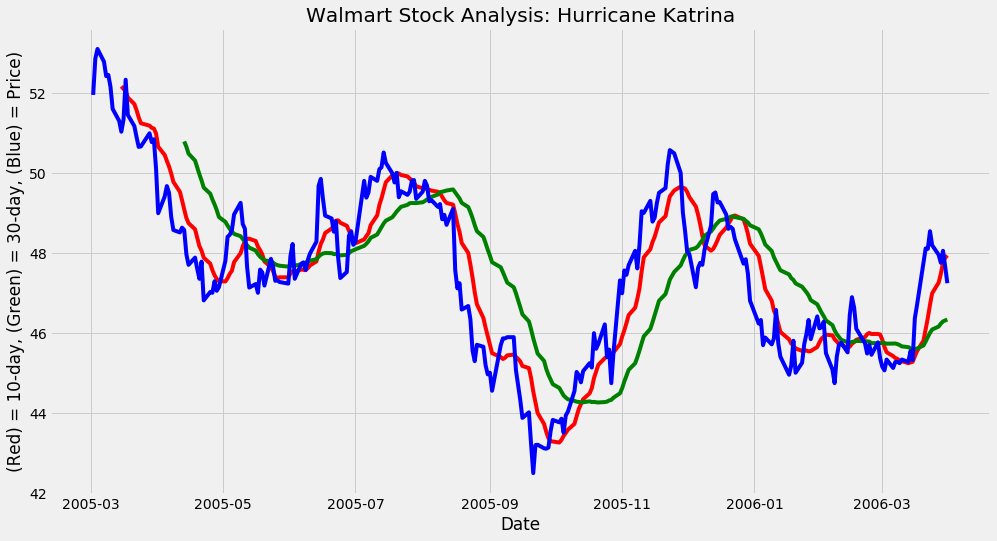

In [14]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Walmart Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")


In [15]:
path_2 = r'C:\Users\Komron\Documents\PythonData\project_one\HD'
all_files_hd = glob.glob(os.path.join(path_2, '*.csv'))

df_from_each_file_hd = (pd.read_csv(f) for f in all_files_hd)

concatenated_df_hd = pd.concat(df_from_each_file_hd, ignore_index=True)
concatenated_df_hd.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2-Jan-87,0.395062,0.397805,0.392318,0.395062,2745300,0.267824
1,5-Jan-87,0.406036,0.425240,0.406036,0.422497,2941200,0.286423
2,6-Jan-87,0.422497,0.422497,0.414266,0.417010,3601800,0.282703
3,7-Jan-87,0.419753,0.441701,0.419753,0.441701,5888100,0.299442
4,8-Jan-87,0.438957,0.438957,0.425240,0.430727,1531800,0.292002


In [16]:
concatenated_df_hd['Date'] = pd.to_datetime(concatenated_df_hd['Date'])
concatenated_df_hd = concatenated_df_hd.sort_values(by='Date')

In [17]:
hur_kat_df_hd = concatenated_df_hd[(concatenated_df_hd['Date'] > '2005-03-01') & (concatenated_df_hd['Date'] < '2006-4-01')]
hur_kat_df_hd.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
4582,2005-03-02,39.849998,40.189999,39.779999,39.980000,7257100,29.150328
4583,2005-03-03,39.990002,40.150002,39.700001,39.720001,6993800,28.960772
4584,2005-03-04,39.950001,40.150002,39.700001,40.090000,5639700,29.230536
4585,2005-03-07,40.009998,40.270000,39.790001,39.880001,6808200,29.077419
4586,2005-03-08,39.950001,40.139999,39.849998,39.970001,5578000,29.216303
4587,2005-03-09,39.840000,39.900002,39.480000,39.490002,7951000,28.865456
4588,2005-03-10,39.410000,39.889999,39.410000,39.889999,5574900,29.157827
4589,2005-03-11,39.799999,40.000000,39.360001,39.419998,5837300,28.814283
4590,2005-03-14,39.599998,39.669998,38.759998,39.470001,8673000,28.850830
4591,2005-03-15,39.650002,39.990002,39.549999,39.759998,7213700,29.062807


In [18]:
date = hur_kat_df_hd['Date'].tolist()
closep = hur_kat_df_hd['Close'].tolist()
highp = hur_kat_df_hd['High'].tolist()
lowp = hur_kat_df_hd['Low'].tolist()
openp = hur_kat_df_hd['Open'].tolist()
volume = hur_kat_df_hd['Volume'].tolist()

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

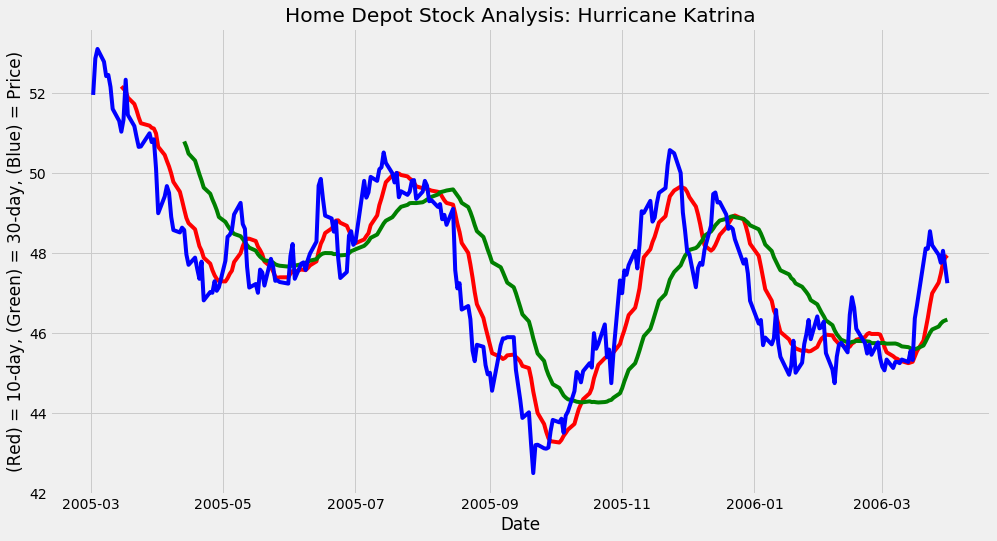

In [19]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Home Depot Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")

In [20]:
closep_wmt = hur_kat_df_wmt['Close'].tolist()
closep_hd = hur_kat_df_hd['Close'].tolist()
ma3_wmt = moving_average(closep_wmt,MA3)
ma3_hd = moving_average(closep_hd,MA3)

Text(0,0.5,'(Red) = Walmart, (Green) = Home Depot')

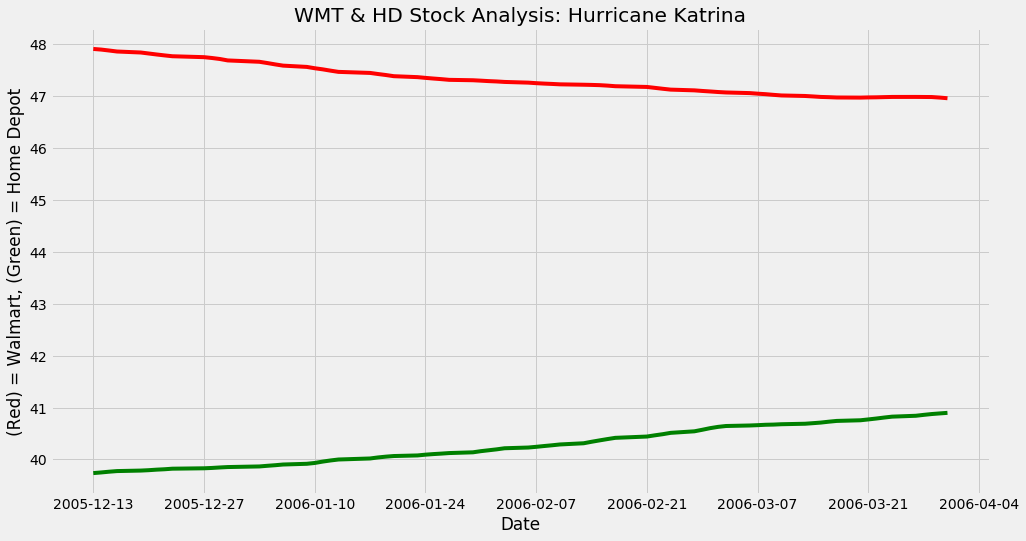

In [21]:
plt.figure(figsize=(15,8))

WMT_MA50, = plt.plot(short_date_3, ma3_wmt, color="red", label="WMT")
HD_MA50, = plt.plot(short_date_3, ma3_hd, color="green", label="HD")

plt.title("WMT & HD Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = Walmart, (Green) = Home Depot")